# Step 1: Installation and Setup

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing dataset from kaggle 

In [3]:
import os
import json

# Load the Kaggle API key from a JSON file
with open("kaggle (1).json", "r") as file:
    kaggle_info = json.load(file)

# Set Kaggle username and key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_info["username"]
os.environ['KAGGLE_KEY'] = kaggle_info["key"]

In [4]:
# Downloading The Dataset
!kaggle competitions download -c santander-customer-satisfaction

santander-customer-satisfaction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# unzip datasets
!unzip "/Users/yaseerarafatkhan/Downloads/Machine Learning & Deep Learning Projects for Beginners 2023/DEEP LEARNING Projects/Project 17: Predicting the Bank Customer Satisfaction with CNN/santander-customer-satisfaction.zip"

Archive:  /Users/yaseerarafatkhan/Downloads/Machine Learning & Deep Learning Projects for Beginners 2023/DEEP LEARNING Projects/Project 17: Predicting the Bank Customer Satisfaction with CNN/santander-customer-satisfaction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
dataset = pd.read_csv("train.csv")

In [7]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# Step 3: Data Preprocessing

In [8]:
dataset.shape

(76020, 371)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [10]:
dataset.select_dtypes(include="object").columns

Index([], dtype='object')

In [11]:
len(dataset.select_dtypes(include="object").columns)

0

In [12]:
dataset.select_dtypes(include=["float64","int64"]).columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [13]:
len(dataset.select_dtypes(include=["float64","int64"]).columns)

371

In [14]:
# independent variables (Matrix of features)
x = dataset.drop(labels=['ID','TARGET'], axis=1)

In [15]:
# dependent variable
y = dataset['TARGET']

In [16]:
x.shape, y.shape

((76020, 369), (76020,))

In [17]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
x_train.shape, x_test.shape

((60816, 369), (15204, 369))

# Step 4: Remove constant, Quasi constant and duplicate features

In [19]:
from sklearn.feature_selection import VarianceThreshold

In [20]:
rm_f = VarianceThreshold(threshold=0.01)
x_train = rm_f.fit_transform(x_train)
x_test = rm_f.transform(x_test)

In [21]:
x_train.shape,x_test.shape

((60816, 266), (15204, 266))

In [22]:
#remove duplicate features
x_train_t = x_train.T
x_test_t = x_test.T

In [23]:
x_test_t = pd.DataFrame(x_test_t)
x_train_t = pd.DataFrame(x_train_t)

In [24]:
x_train_t.shape,x_test_t.shape

((266, 60816), (266, 15204))

In [25]:
# number of duplicate features
x_train_t.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

In [26]:
x_train_t.duplicated().sum()

16

In [27]:
duplicated_features =  x_train_t.duplicated()

In [28]:
features_to_keep = [not index for index in duplicated_features]

In [29]:
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [30]:
x_train = x_train_t[features_to_keep].T

In [31]:
x_test = x_test_t[features_to_keep].T

In [32]:
x_train.shape,x_test.shape

((60816, 250), (15204, 250))

In [33]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
x_test.shape,x_train.shape

((15204, 250), (60816, 250))

In [35]:
x_train = x_train.reshape((60816, 250,1))
x_test = x_test.reshape((15204, 250,1))

In [36]:
x_test.shape,x_train.shape

((15204, 250, 1), (60816, 250, 1))

In [37]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Step 5: Building the model

In [38]:
# define an object
model = tf.keras.models.Sequential()

In [39]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape = (250, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [40]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [41]:
# third CNN layer
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [43]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [44]:
# first dense layer (fully connected layer)
model.add(tf.keras.layers.Dense(units=256, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [45]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 248, 32)           128       
                                                                 
 batch_normalization (Batch  (None, 248, 32)           128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 124, 32)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 124, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 122, 64)           6208      
                                                                 
 batch_normalization_1 (Bat  (None, 122, 64)           2

In [47]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

In [48]:
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Training the model

In [49]:
history = model.fit(x_train, y_train,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1901/1901 [==============================] - 48s 25ms/step - loss: 0.2335 - accuracy: 0.9513 - val_loss: 0.2057 - val_accuracy: 0.9574
Epoch 2/10
1901/1901 [==============================] - 48s 25ms/step - loss: 0.1771 - accuracy: 0.9598 - val_loss: 0.1953 - val_accuracy: 0.9577
Epoch 3/10
1901/1901 [==============================] - 49s 26ms/step - loss: 0.1662 - accuracy: 0.9606 - val_loss: 0.1802 - val_accuracy: 0.9583
Epoch 4/10
1901/1901 [==============================] - 48s 25ms/step - loss: 0.1631 - accuracy: 0.9608 - val_loss: 0.1752 - val_accuracy: 0.9582
Epoch 5/10
1901/1901 [==============================] - 47s 25ms/step - loss: 0.1605 - accuracy: 0.9609 - val_loss: 0.1722 - val_accuracy: 0.9583
Epoch 6/10
1901/1901 [==============================] - 45s 24ms/step - loss: 0.1584 - accuracy: 0.9609 - val_loss: 0.1714 - val_accuracy: 0.9580
Epoch 7/10
1901/1901 [==============================] - 44s 23ms/step - loss: 0.1567 - accuracy: 0.9610 - val_loss: 0.1706 -

In [55]:
# Model prediction
y_pred_probs = model.predict(x_test)  # Get predicted probabilities for each class

# Extract the class with the highest probability as the predicted class
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()

476/476 [==============================] - 3s 6ms/step


In [56]:
print(y_pred[12]), print(y_test[12])

0
0


(None, None)

In [57]:
# confusion matrix
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14570     0]
 [  634     0]]


In [58]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9583004472507235


# Step 7: Learning Curve

In [59]:
def learning_curve(history,epoch):
    #training vs validation accuracy
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history["accuracy"])
    plt.plot(epoch_range,history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Val"],loc ="upper left")
    plt.grid(True) 
    plt.show()
    
    #training vs validation loss
    plt.plot(epoch_range,history.history["loss"])
    plt.plot(epoch_range,history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.grid(True) 
    plt.show()

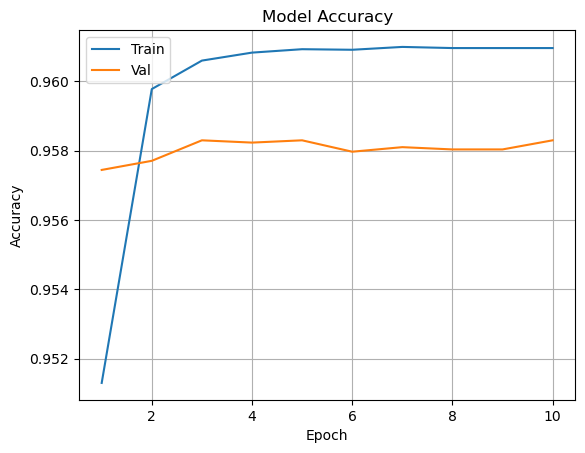

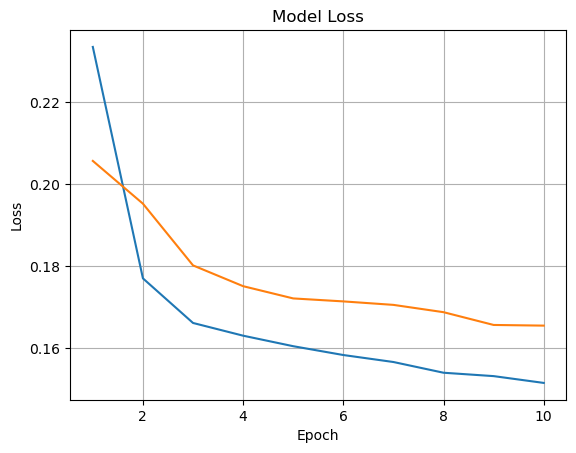

In [61]:
learning_curve(history, 10)
